Importing necessary modules

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [2]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [7]:
#pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ------------ ------------------------- 30.7/96.5 kB 660.6 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/96.5 kB 330.3 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 655.4 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 655.4 kB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 425.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# uploading the data and reading the first five rows
df = pd.read_excel("Sample - Superstore.xls")
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [4]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

There are several categories in the superstore sales data, we start from time series analysis and forecasting for furniture sales

In [5]:
# starting from furniture sales category
furniture = df.loc[df['Category'] == 'Furniture']

In [11]:
# check out furniture data
furniture

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
5          6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
10        11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
...      ...             ...        ...        ...             ...   
9962    9963  CA-2015-168088 2015-03-19 2015-03-22     First Class   
9964    9965  CA-2016-146374 2016-12-05 2016-12-10    Second Class   
9980    9981  US-2015-151435 2015-09-06 2015-09-09    Second Class   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   

     Customer ID     Customer Name      Segment        Country  \
0       CG-12520       Claire Gute     Consumer  United States   
1       CG-12520       Claire Gute     Consumer  United States   
3       SO-20335    Sean O'Donnell     Consumer  United States   
5       BH-11710   Brosina Hoffman     Consumer  United States   
10      BH-11710   Brosina Hoffman     Consumer  United States   
...          ...               ...          ...            ...   
9962    CM-12655  Corinna Mitchell  Home Office  United States   
9964    HE-14800      Harold Engle    Corporate  United States   
9980    SW-20455       Shaun Weien     Consumer  United States   
9989    TB-21400  Tom Boeckenhauer     Consumer  United States   
9990    DB-13060       Dave Brooks     Consumer  United States   

                 City  ... Postal Code   Region       Product ID   Category  \
0           Henderson  ...       42420    South  FUR-BO-10001798  Furniture   
1           Henderson  ...       42420    South  FUR-CH-10000454  Furniture   
3     Fort Lauderdale  ...       33311    South  FUR-TA-10000577  Furniture   
5         Los Angeles  ...       90032     West  FUR-FU-10001487  Furniture   
10        Los Angeles  ...       90032     West  FUR-TA-10001539  Furniture   
...               ...  ...         ...      ...              ...        ...   
9962          Houston  ...       77041  Central  FUR-BO-10004218  Furniture   
9964           Newark  ...       19711     East  FUR-FU-10002671  Furniture   
9980        Lafayette  ...       70506    South  FUR-TA-10001039  Furniture   
9989            Miami  ...       33180    South  FUR-FU-10001889  Furniture   
9990       Costa Mesa  ...       92627     West  FUR-FU-10000747  Furniture   

     Sub-Category                                       Product Name  \
0       Bookcases                  Bush Somerset Collection Bookcase   
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
3          Tables      Bretford CR4500 Series Slim Rectangular Table   
5     Furnishings  Eldon Expressions Wood and Plastic Desk Access...   
10         Tables           Chromcraft Rectangular Conference Tables   
...           ...                                                ...   
9962    Bookcases  Bush Heritage Pine Collection 5-Shelf Bookcase...   
9964  Furnishings  Electrix 20W Halogen Replacement Bulb for Zoom...   
9980       Tables                         KI Adjustable-Height Table   
9989  Furnishings                             Ultra Door Pull Handle   
9990  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   

          Sales  Quantity  Discount    Profit  
0      261.9600         2      0.00   41.9136  
1      731.9400         3      0.00  219.5820  
3      957.5775         5      0.45 -383.0310  
5       48.8600         7      0.00   14.1694  
10    1706.1840         9      0.20   85.3092  
...         ...       ...       ...       ...  
9962   383.4656         4      0.32  -67.6704  
9964    13.4000         1      0.00    6.4320  
9980    85.9800         1      0.00   22.3548  
9989    25.2480         3      0.20    4.1028  
9990    91.9600         2     

We have a good 4-year furniture sales data

In [6]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

#### Data Preprocessing

In [7]:
# checking the columns available in our furniture data
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
# removing columns we don't need
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

In [9]:
# checking our new furniture data
furniture

Order Date      Sales
0    2016-11-08   261.9600
1    2016-11-08   731.9400
3    2015-10-11   957.5775
5    2014-06-09    48.8600
10   2014-06-09  1706.1840
...         ...        ...
9962 2015-03-19   383.4656
9964 2016-12-05    13.4000
9980 2015-09-06    85.9800
9989 2014-01-21    25.2480
9990 2017-02-26    91.9600

[2121 rows x 2 columns]

In [10]:
# sort values by date
furniture = furniture.sort_values('Order Date')

In [11]:
# check for missing values
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [12]:
# checking furniture data
furniture

Order Date     Sales
7474 2014-01-06  2573.820
7660 2014-01-07    76.728
866  2014-01-10    51.940
716  2014-01-11     9.940
2978 2014-01-13   545.940
...         ...       ...
7636 2017-12-29   258.750
7632 2017-12-29  1207.840
5131 2017-12-29   101.120
7635 2017-12-29   300.980
906  2017-12-30   323.136

[2121 rows x 2 columns]

In [13]:
# aggregating sales by date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [14]:
furniture

Order Date      Sales
0   2014-01-06  2573.8200
1   2014-01-07    76.7280
2   2014-01-10    51.9400
3   2014-01-11     9.9400
4   2014-01-13   879.9390
..         ...        ...
884 2017-12-24  1393.4940
885 2017-12-25   832.4540
886 2017-12-28   551.2568
887 2017-12-29  2330.7180
888 2017-12-30   323.1360

[889 rows x 2 columns]

##### Indexing with Time series data

In [15]:
# index furniture data by order date
furniture = furniture.set_index('Order Date')

In [16]:
# print out the indexes
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [18]:
# average daily sales value for months
y = furniture['Sales'].resample('MS').mean()
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

In [19]:
# checking furniture sales data for 2017
y['2017']

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

##### Visualizing Furniture Sales Time Series Data

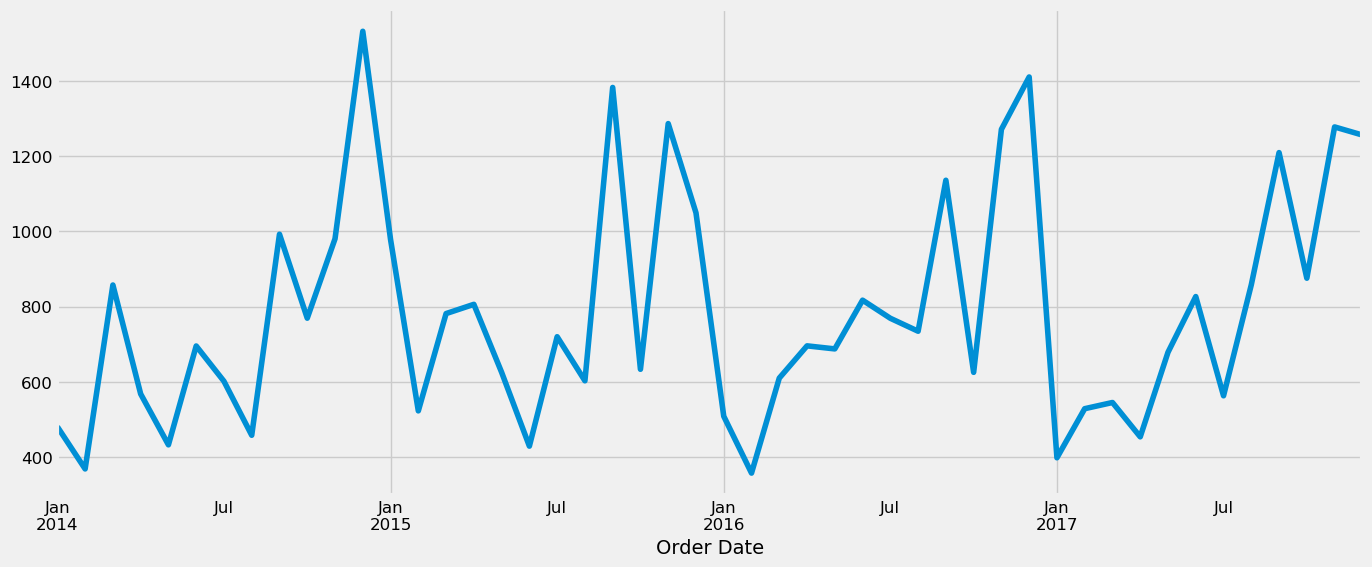

In [20]:
# make a normal plot of furniture sales data
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

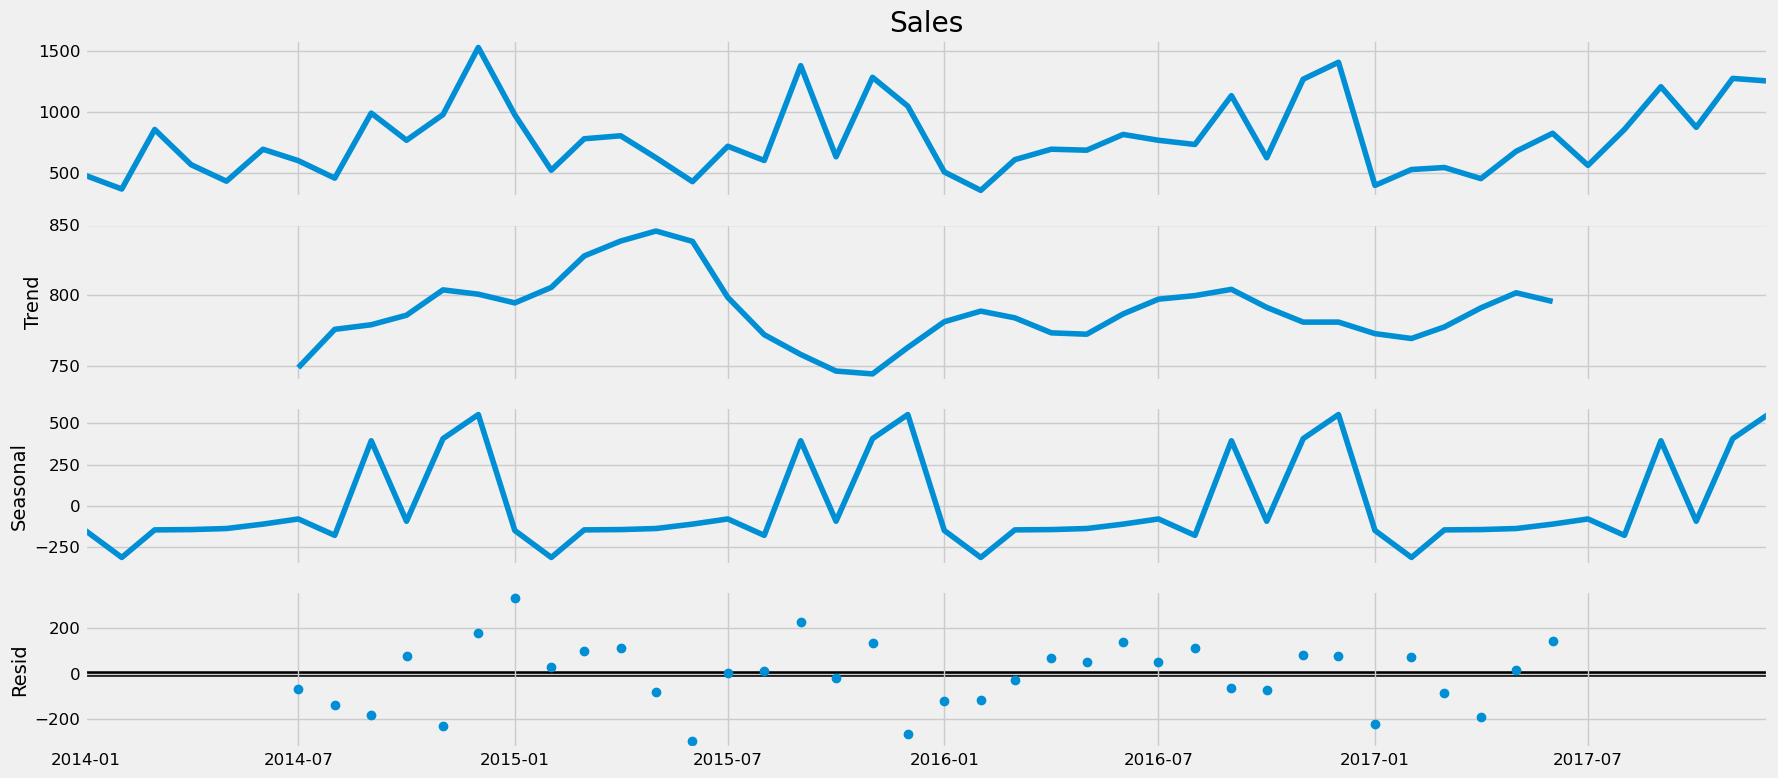

In [21]:
# using time-series decomposition to decompose our time series
# into three distinct components: trend, seasonality,and noise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

#### Time Series forecasting with ARIMA

ARIMA stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [23]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1430.5940158227277
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793677
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1158.2854937559018
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302517
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2697.1031230300146
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809151
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.626138967329


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.55950316969984
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2400.0650000466026
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946864
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255765247517
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668259312
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1264.4207196739255
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672393664


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.9671228167958
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1414.5134153732486
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151378
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817193
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:847.6019230667778
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482754


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233382207
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427366


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1810.7509102358645
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684173545
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461242
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1385.6351484602928
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751609543
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935203


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1195.964240365809
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750846094
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.58426921438667
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442186365
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2435.1094351848865
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195815041


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422193965867
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323877161


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2338.4678839768753
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560022255677
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131884600347
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1217.4797899156645
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619096
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587847334


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1281.6948923170728
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345421
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992507578
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835682


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:252.25192274445558
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687609841
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939428
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.525035466087


C:\Users\EKOW\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2176.751338552423
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395364587
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661014410168


The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 297.78. Therefore we should consider this to be optimal option.

##### Fitting the ARIMA model

In [26]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


We should always run model diagnostics to investigate any unusual behavior.

In [33]:
#results.plot_diagnostics(figsize=(16, 8))
#plt.show()

##### Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

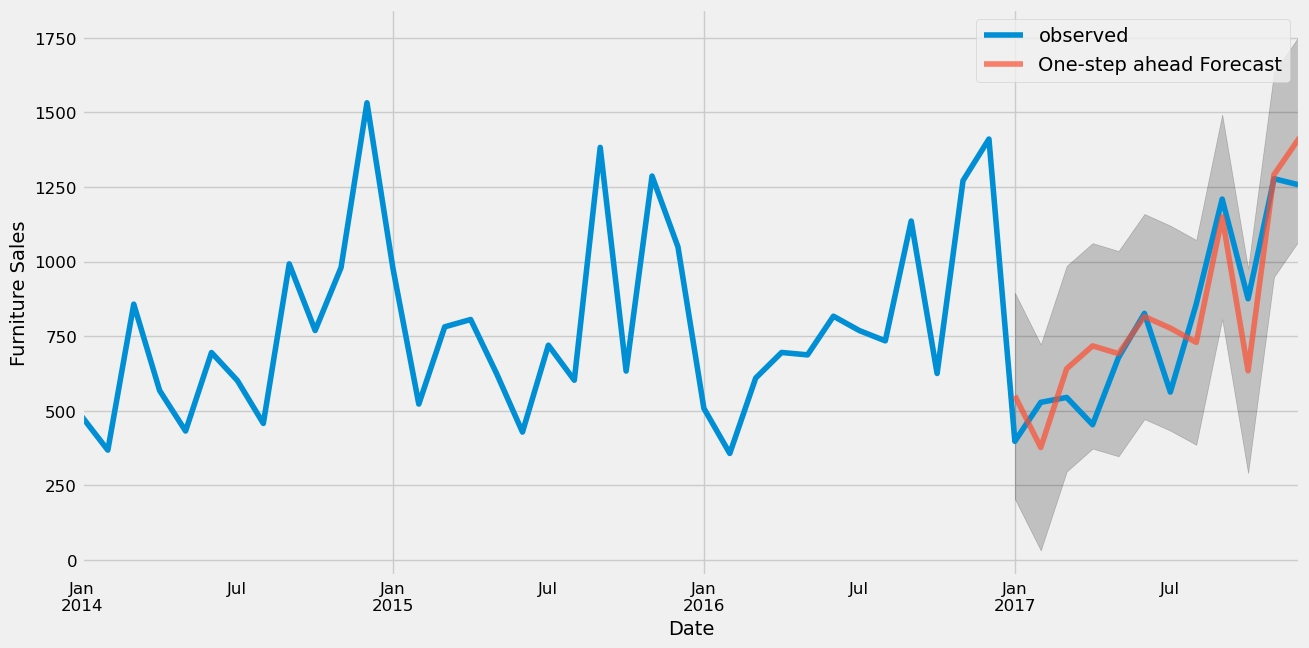

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [30]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22993.57


In [31]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

#### Producing and visualizing forecasts

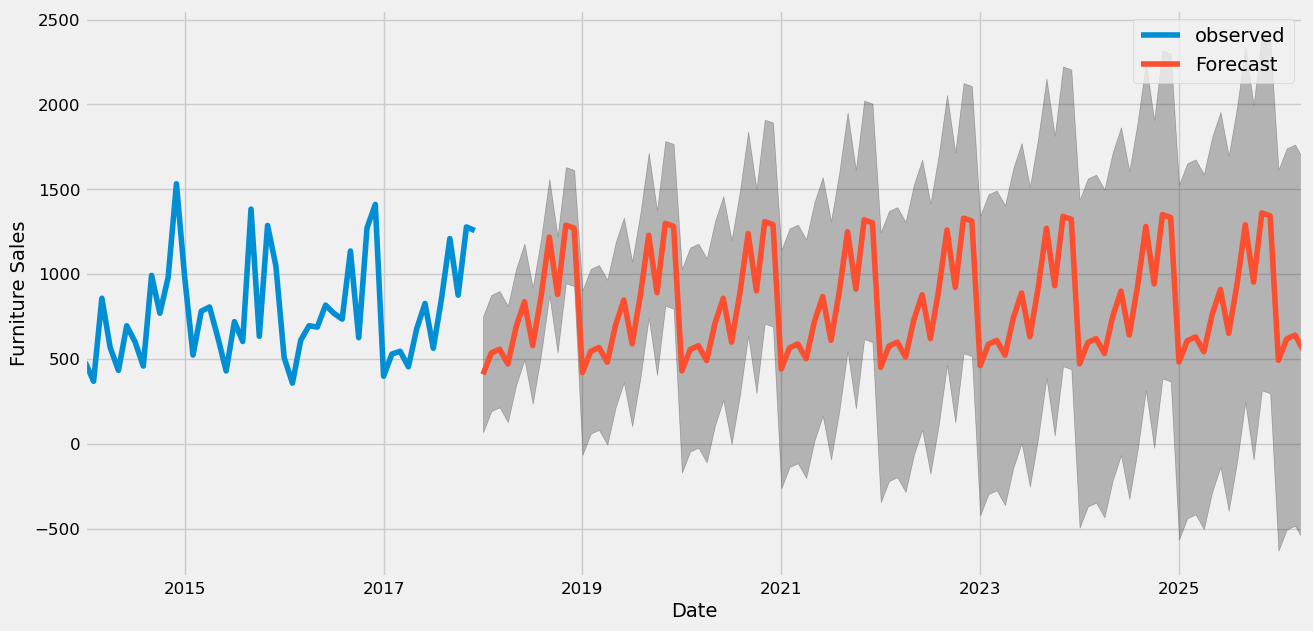

In [32]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other over time. Therefore, we are going to compare time series of furniture and office supplier.

#### Time Series of Furniture vs Office Supplies

According to our data, there were way more number of sales from Office Supplies than from Furniture over the years.

In [34]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

#### Data Exploration

We are going to compare two categories’ sales in the same time period. This means combine two data frames into one and plot these two categories’ time series into one plot.

In [36]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

Order Date  furniture_sales  office_sales
0 2014-01-01       480.194231    285.357647
1 2014-02-01       367.931600     63.042588
2 2014-03-01       857.291529    391.176318
3 2014-04-01       567.488357    464.794750
4 2014-05-01       432.049188    324.346545

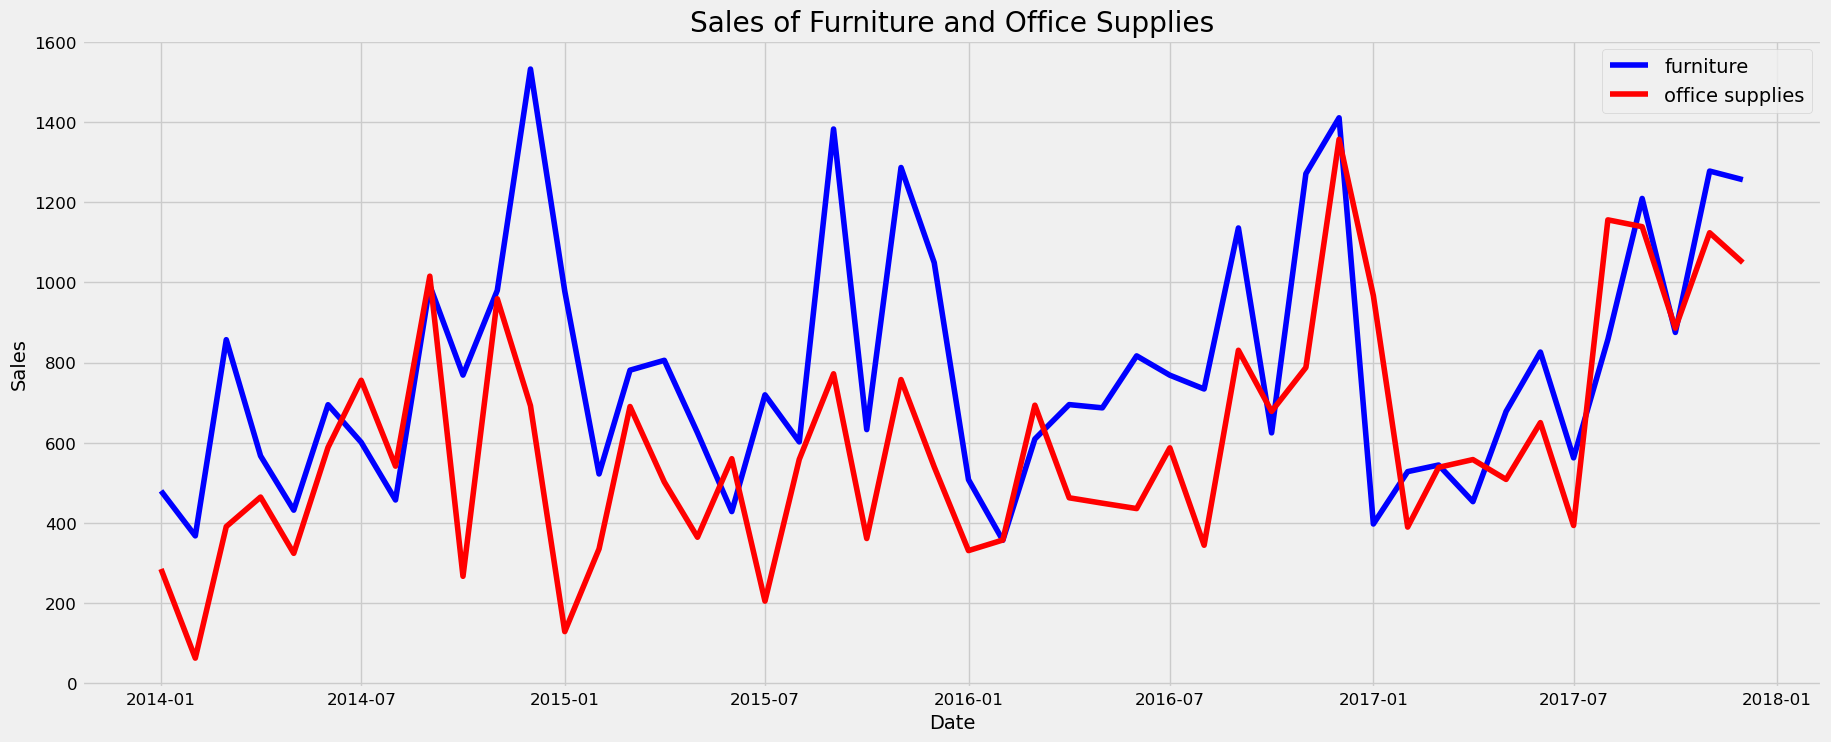

In [37]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

We observe that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occasionally, office supplies passed furniture on average daily sales. Let’s find out when was the first time office supplies’ sales surpassed those of furniture’s.

In [39]:

# Find the index of the first row where office_sales > furniture_sales
first_index = np.min(np.where(store['office_sales'] > store['furniture_sales']))

# Use .loc to get the 'Order Date' value at that index
first_date = store.loc[first_index, 'Order Date']

print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


#### Time Series Modeling with Prophet

Prophet is a forecasting tool designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

In [6]:
pip install Cython

  Obtaining dependency information for Cython from https://files.pythonhosted.org/packages/ea/8f/216de5d7bede3e26a7131b427a8aadade032f03f9c8ee88792def02e2cf4/Cython-3.0.2-cp311-cp311-win_amd64.whl.metadata
  Using cached Cython-3.0.2-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -----------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [7]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.Collecting fbprophet
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Obtaining dependency information for holidays>=0.10.2 from https://files.pythonhosted.org/packages/0e/6d/8a673d26d687486aac3b2b77faaa9fe5f452cadc2fc586081ddeda3b5140/holidays-0.33-py3-none-any.whl.metadata
  Using cached holidays-0.33-py3-none-any.whl.metadata (16 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.1.4-cp311-cp311-win_amd64.whl 

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [58 lines of output]
  C:\Users\EKOW\AppData\Local\Temp\pip-install-zitexwvq\fbprophet_24a7db34861a4e8bad37ef2ac077ceaa\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    from pkg_resources import (
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  NumExpr defaulting to 4 threads.
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\EKOW\AppData\Local\Temp\pip-install-zitexwvq\fbprophet_24a7db34861a4e8bad37ef2ac077ceaa\setup.py", line 122, in <module>
      setup(
    File "C:\Users\EKOW\anaconda3\Lib\site-packages\setuptools\__init__.py", line 107, in setup
      return

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\aux_\preprocessor\traits\decl_sign_\validate_\this.hpp -> build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\aux_\preprocessor\traits\decl_sign_\validate_
  creating build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail
  creating build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor\line_counter.hpp -> build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor\void_list.hpp -> build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor
  creating build\lib.win-amd

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from fbprophet import Prophet

In [ ]:
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

In [ ]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

##### Compare Forecasts

We already have the forecasts for three years for these two categories into the future. We will now join them together to compare their future forecasts.

In [ ]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

##### Trend and Forecast Visualization

Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

In [ ]:
furniture_model.plot_components(furniture_forecast);

In [ ]:
office_model.plot_components(office_forecast);

Good to see that the sales for both furniture and office supplies have been linearly increasing over time and will be keep growing, although office supplies’ growth seems slightly stronger.

The worst month for furniture is April, the worst month for office supplies is February. The best month for furniture is December, and the best month for office supplies is October.

In [1]:
conda install -c conda-forge prophet

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\EKOW\anaconda3

  added / updated specs:
    - prophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       h56e8100_0         146 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    cmdstan-2.33.1             |       hcde1630_0        49.1 MB  conda-forge
    cmdstanpy-1.1.0            |     pyhd8ed1ab_0          64 KB  conda-forge
    conda-23.7.4               |  py311haa95532_0         1.3 MB
    conda-content-trust-0.2.0  |     pyhd8ed1ab_0          57 KB  conda-forge
    convertdate-2.4.0          |     pyhd8ed1ab_0          38 KB  conda-forge
    ephem-4.1.2                |  py311h2bbff1b_0         1.3 MB
    holidays-0.33              |     pyh










m2-coreutils-8.25    | 4.5 MB    | ##9        |  29% 


















m2w64-gcc-ada-5.3.0  | 33.3 MB   |            |   0% 










m2w64-gcc-5.3.0      | 40.8 MB   | 4          |   5% 





m2w64-gcc-fortran-5. | 10.2 MB   | ###8       |  38% 











m2w64-gcc-objc-5.3.0 | 15.2 MB   | 9          |  10% 















m2-coreutils-8.25    | 4.5 MB    | ###        |  30% 










m2w64-gcc-5.3.0      | 40.8 MB   | 4          |   5% 


















m2w64-gcc-ada-5.3.0  | 33.3 MB   |            |   1% 





m2w64-gcc-fortran-5. | 10.2 MB   | ###8       |  38% 











m2w64-gcc-objc-5.3.0 | 15.2 MB   | 9          |  10% 















m2-coreutils-8.25    | 4.5 MB    | ###        |  31% 





m2w64-gcc-fortran-5. | 10.2 MB   | ###8       |  39% 










m2w64-gcc-5.3.0      | 40.8 MB   | 4          |   5% 


















m2w64-gcc-ada-5.3.0  | 33.3 MB   |            |   1% 





m2w64-gcc-fortran-5. | 10.2 MB   | ###8       |  39% 











m2w64-gcc-objc

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/

















m2w64-gcc-ada-5.3.0  | 33.3 MB   | #3         |  13% 











m2w64-gcc-objc-5.3.0 | 15.2 MB   | ##5        |  25% 





m2w64-gcc-fortran-5. | 10.2 MB   | #######7   |  77% 










m2w64-gcc-5.3.0      | 40.8 MB   | #1         |  12% 















m2-coreutils-8.25    | 4.5 MB    | ######4    |  64% 


















m2w64-gcc-ada-5.3.0  | 33.3 MB   | #3         |  13% 





m2w64-gcc-fortran-5. | 10.2 MB   | #######7   |  78% 










m2w64-gcc-5.3.0      | 40.8 MB   | #1         |  12% 















m2-coreutils-8.25    | 4.5 MB    | ######5    |  65% 











m2w64-gcc-objc-5.3.0 | 15.2 MB   | ##5        |  25% 


















m2w64-gcc-ada-5.3.0  | 33.3 MB   | #3         |  14% 





m2w64-gcc-fortran-5. | 10.2 MB   | #######8   |  78% 















m2-coreutils-8.25    | 4.5 MB    | ######5    |  65% 










m2w64-gcc-5.3.0      | 40.8 MB   | #1         |  12% 


















m2w64-gcc-ada-5.3.0  | 33.3 MB   | #3         |  14% 





m2w